In [184]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import datetime

In [164]:
discard_df = pd.read_csv("../csv/datasets/complete_discard.csv")
average_df = pd.read_csv("../csv/datasets/complete_avg.csv")
predict_df = pd.read_csv("../csv/datasets/complete_pred.csv")


# Random Forest Regression

In [143]:
def rfr(df1, n_splits):
    tscv = TimeSeriesSplit(n_splits)

    df = df1.copy()

    model = RandomForestRegressor(random_state=42)

    df['Date'] = pd.to_datetime(df['Date']).values.astype(float)

    X = df.drop(labels=['Sales'], axis=1)
    y = df['Sales']

    avg_score = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        score = model.score(X_test, y_test)

        avg_score.append(score)

        # print("Score:", score)
    return sum(avg_score) / len(avg_score)


In [71]:
rfr_split_test = {}
for n in range(2, 21):
    print(n)
    avg1 = rfr(discard_df, n)
    avg2 = rfr(predict_df, n)
    avg3 = rfr(average_df, n)
    rfr_split_test[str(n)] = (avg1 + avg2 + avg3) / 3


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [72]:
print(rfr_split_test)

{'2': 0.5202709874441691, '3': 0.6514927420565492, '4': 0.7377103338776653, '5': 0.66781123946202, '6': 0.6825581796300182, '7': 0.7628629878455776, '8': 0.7109230979263187, '9': 0.7952893346635758, '10': 0.7830776337262212, '11': 0.7122362481142853, '12': 0.79807658055344, '13': 0.7662192250094879, '14': 0.7655079051619378, '15': 0.7442026798178533, '16': 0.8083466286047217, '17': 0.8012846516598223, '18': 0.7513142527561012, '19': 0.8127589120441207, '20': 0.7732383084193918}


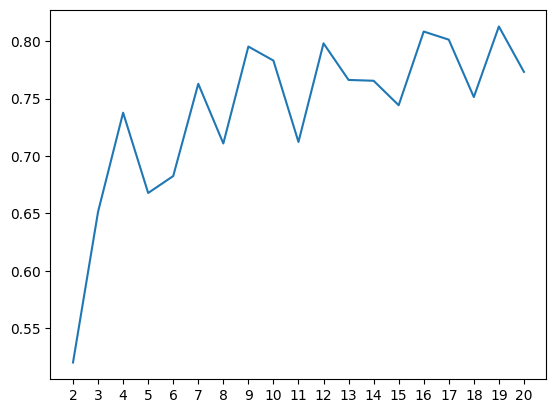

In [73]:
import matplotlib.pylab as plt

lists = (rfr_split_test.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [182]:
splits = 19

#print(rfr(discard_df, splits))

print(rfr(average_df, splits))

#print(rfr(predict_df, splits))


0.8218147708237907


# Linear Regression

In [75]:
def lin_reg(df1, n_splits):

    df = df1.copy()

    tscv = TimeSeriesSplit(n_splits)

    model = LinearRegression()

    df['Date'] = pd.to_datetime(df['Date']).values.astype(float)

    X = df.drop(labels=['Sales'], axis=1)
    y = df['Sales']

    avg_score = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        score = model.score(X_test, y_test)

        avg_score.append(score)

        # print("Score:", score)

    return sum(avg_score) / len(avg_score)

In [79]:
linreg_split_test = {}
for n in range(2, 21):
    print(n)
    avg1 = lin_reg(discard_df, n)
    avg2 = lin_reg(average_df, n)
    avg3 = lin_reg(predict_df, n)
    #print(avg)
    linreg_split_test[str(n)] = (avg1 + avg2 + avg3) / 3

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [80]:
print(linreg_split_test)
print(max(linreg_split_test, key=linreg_split_test.get))


{'2': 0.6176455619066914, '3': 0.6590903351053039, '4': 0.681173563565022, '5': 0.7165679195241594, '6': 0.7312341571072835, '7': 0.7228230168625488, '8': 0.7359166037162165, '9': 0.7446200735035652, '10': 0.7453049253304483, '11': 0.7581903343490369, '12': 0.7625082112208204, '13': 0.7562156871213018, '14': 0.7566031169643134, '15': 0.7543559377421248, '16': 0.7670385773772258, '17': 0.7629220855439947, '18': 0.7719890232227556, '19': 0.765852072159997, '20': 0.7711294294554968}
18


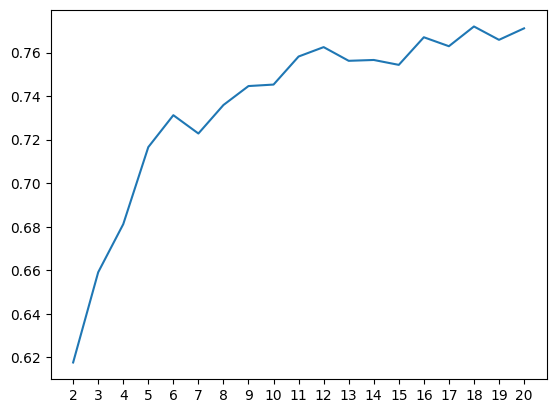

In [81]:
import matplotlib.pylab as plt

lists = (linreg_split_test.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [92]:
splits = 12

print(lin_reg(discard_df, splits))

print(lin_reg(average_df, splits))

print(lin_reg(predict_df, splits))

0.7555705726754542
0.7680152120879747
0.7639388488990319


# XGBoost Regressor

In [83]:
def xgb_reg(df1, n_splits):

    df = df1.copy()

    tscv = TimeSeriesSplit(n_splits)

    model = XGBRegressor(random_state=42)

    df['Date'] = pd.to_datetime(df['Date']).values.astype(float)

    X = df.drop(labels=['Sales'], axis=1)
    y = df['Sales']

    avg_score = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        score = model.score(X_test, y_test)

        avg_score.append(score)

        # print("Score:", score)

    return sum(avg_score) / len(avg_score)

In [87]:
xgb_split_test = {}
for n in range(2, 21):
    print(n)
    avg1 = xgb_reg(discard_df, n)
    avg2 = xgb_reg(average_df, n)
    avg3 = xgb_reg(predict_df, n)
    #print(avg)
    xgb_split_test[str(n)] = (avg1 + avg2 + avg3) / 3

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [88]:
print(xgb_split_test)
#print(max(xgb_split_test, key=xgb_split_test.get))

{'2': 0.455093768884195, '3': 0.5250484239680234, '4': 0.7268776881140275, '5': 0.6118855487897834, '6': 0.6845094378853798, '7': 0.7054771100105093, '8': 0.6902946667489216, '9': 0.7930460466382653, '10': 0.789228033807763, '11': 0.6947418749999139, '12': 0.789680895704798, '13': 0.7758315706237765, '14': 0.7729095734855015, '15': 0.7281600959066662, '16': 0.795341504660231, '17': 0.7860638657087583, '18': 0.7804807591804787, '19': 0.8049125037009931, '20': 0.7730588485744443}


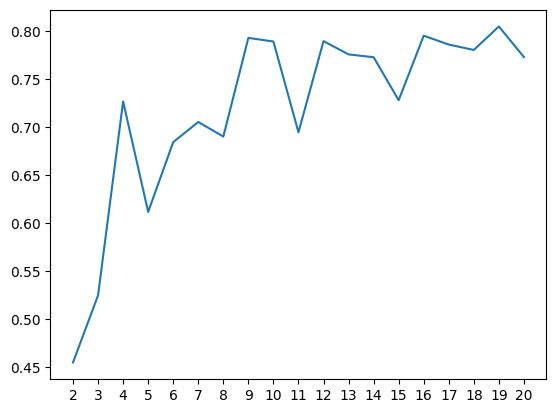

In [89]:
import matplotlib.pylab as plt

lists = (xgb_split_test.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [181]:
splits = 19

#print(xgb_reg(discard_df, splits))

print(xgb_reg(average_df, splits))

#print(xgb_reg(predict_df, splits))

0.8271971039192006


In [ ]:
# disc_0_df = discard_df.loc[discard_df['Company'] == 0].reset_index(drop=True)
# avg_0_df = average_df.loc[average_df['Company'] == 0].reset_index(drop=True)
# pred_0_df = predict_df.loc[predict_df['Company'] == 0].reset_index(drop=True)

# disc_1_df = discard_df.loc[discard_df['Company'] == 1].reset_index(drop=True)
# avg_1_df = average_df.loc[average_df['Company'] == 1].reset_index(drop=True)
# pred_1_df = predict_df.loc[predict_df['Company'] == 1].reset_index(drop=True)

# disc_2_df = discard_df.loc[discard_df['Company'] == 2].reset_index(drop=True)
# avg_2_df = average_df.loc[average_df['Company'] == 2].reset_index(drop=True)
# pred_2_df = predict_df.loc[predict_df['Company'] == 2].reset_index(drop=True)

# Train test the selected model

In [213]:
picked_df = discard_df

split_date = datetime.date(2022,10,3)

target = picked_df[(pd.to_datetime(picked_df["Date"]).dt.date > split_date)].copy()

train = picked_df[(pd.to_datetime(picked_df["Date"]).dt.date <= split_date)].copy()

model = RandomForestRegressor(random_state = 42)

train['Date'] = pd.to_datetime(train['Date']).values.astype(float)
target['Date'] = pd.to_datetime(target['Date']).values.astype(float)

X_train = train.drop(labels=['Sales'], axis=1)
y_train = train['Sales']

X_test = target.drop(labels=['Sales'], axis=1)
y_test = target['Sales']

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = model.score(X_test, y_test)

print('Score:', score)

Score: 0.9188760416103005
